# 线性回归

> Refs:
>
> [machine-learning-notes](http://nbviewer.jupyter.org/github/hschen0712/machine-learning-notes/tree/master/PRML/)
>
> [notes-machine-learning](http://nbviewer.jupyter.org/github/lijin-THU/notes-machine-learning/tree/master/Pattern-Recognition-and-Machine-Learning/)

## 创建一个数据集 $\mathcal{D}$
本节中我们需要对一个多项式进行拟合, 我们选择 $y = sin(2 \pi x) + \epsilon$, 其中 $\epsilon$ 是一个由 $\mu = 0, \sigma = 0.3$ 的高斯分布生成的噪音. 数据集由 $[0, 1]$ 上等距产生的 10 个点 $\boldsymbol{x} = \{x_1, \cdots, x_10\}$ 所计算出的 $\boldsymbol{y}$. 

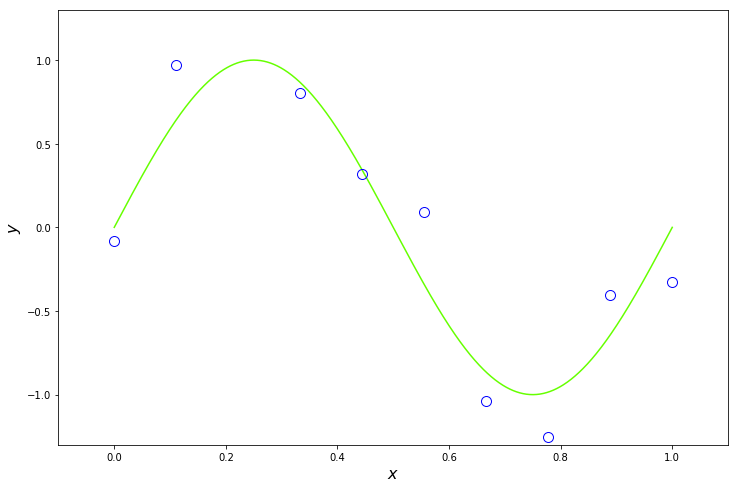

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# 构造目标曲线和训练数据集
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x)
x_tr = np.linspace(0, 1, 10)
y_tr = np.sin(2 * np.pi * x_tr) + np.random.normal(0, 0.3, 10)
# 画图
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='#66FF00')
plt.plot(x_tr, y_tr, 'o', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.3, 1.3)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

## 线性模型
用多项式曲线来拟合目标函数:

$$\hat{y}(x, \boldsymbol{w}) = \sum_{j=0}^M w_j x^j$$

> `M` 为多项式的阶, 也就是模型的复杂度(容量)

该模型为线性模型, 误差函数(error function) 可以用测试集上的 **均方误差(mean squared error)**: $\text{MSE}_{\text{test}} = \frac{1}{m} \sum_i(\hat{\boldsymbol{y}}^{(\text{test}))} - \boldsymbol{y}^{(\text{test})})_i^2 = \frac{1}{m} \lVert \hat{\boldsymbol{y}}^{(\text{test})} - \boldsymbol{y}^{(\text{test})}\rVert_2^2$ (越小越好, 也就是平方欧几里德距离除以 $m$ ).

> MSE 就是作为线性回归的目标函数

最小化 $\text{MSE}_\text{train}$, 通过求其梯度为 0 :

$$
\nabla_w \text{MSE}_\text{train} = 0 \\
\Rightarrow \frac{1}{m} \nabla_w \lVert \boldsymbol{X} \boldsymbol{w} -  \boldsymbol{y} \rVert_2^2  = 0\\
\Rightarrow \boldsymbol{w} = (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top \boldsymbol{y}
$$

### squared error 的含义

首先所有点按照前面的数据集构造法, 为 $p(y | x; \boldsymbol{w}, \beta) = 
\mathcal{N}(y; \hat{y}(x; \boldsymbol{w}), \beta^{-1})$

> 概率函数参数表中的 `;` 而不是像某些书(e.g. PRML) 中的 `|` 是为了区分似然参数和条件概率(而似然函数中的 `|` 一般就不需要改成 `;` 以示区别了).
>
> 上面的是 **条件似然函数**, 是因为, 可能会有多个不同的 $x$ 对应同一个 $y$ (PRML 里面没有这样理解,
> 不过最终的结果是一样的

所以其联合对数似然就是:

$$\sum \ln p(y | x; \boldsymbol{w}, \beta) = -\frac{\beta}{2} \sum_{n=1}^{N}(y(x_n, \boldsymbol{w} - y_n)^2 + \frac{N}{2} \ln \beta - \frac{N}{2} \ln (2 \pi)$$

对于 $\boldsymbol{w}$, 为了令其联合对数使然最大, 也就是最小化 $\frac{1}{2} \lVert \boldsymbol{y}(\boldsymbol{x}, \boldsymbol{w}) - \boldsymbol{y} \rVert_2^2$ (也就是 square error, 这里是把 $\beta$ 当做常数, MSE 只是比这个多了个系数, 不影响后面求导得出 least squares)

模型的容量导致的过拟合和欠拟合(当 M = 0 和 1 的时候为欠拟合, 当 M = 9 的时候为过拟合):

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


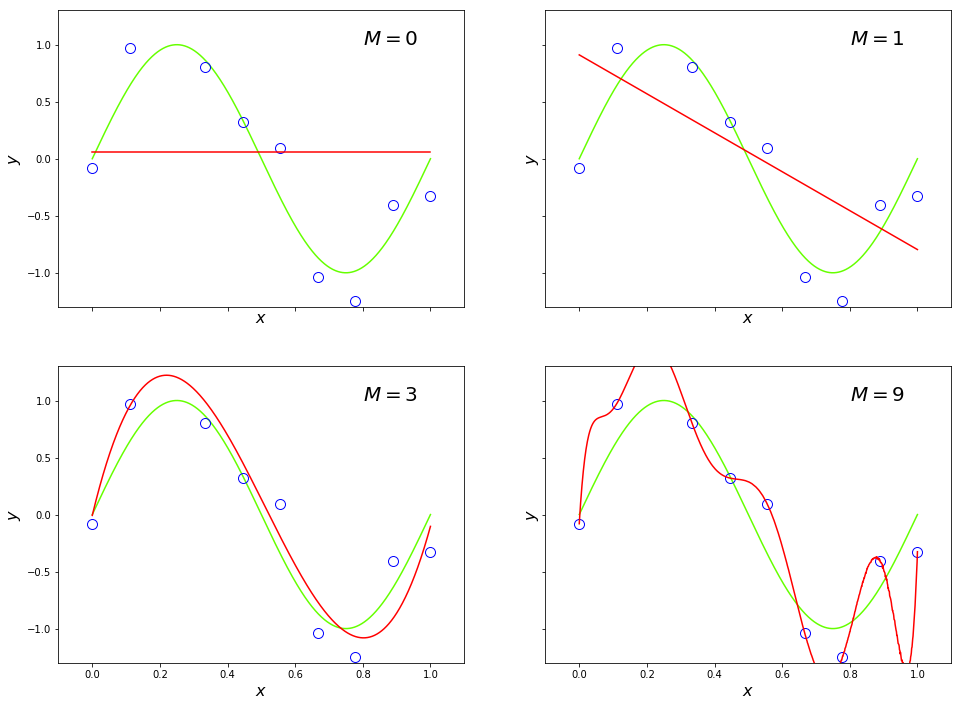

In [11]:
def predict(w, x):
    '''make predictions for x
    # Arguments:
        w: coefficients of the polynomial model
        x: vector of input variables
    # Returns:
        predicted target variables
    '''
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    return X.dot(w) # 点乘


# 模型的不同容量
M_vals = [0, 1, 3, 9]
# 2x2 的子图
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))
# axes 是形如 [[x_1, y_1], [x_2, y_2]] 的列表(x_1 表示图一的 x 轴), 需要扁平化为 [x_1, y_1, x_2, y_2] 的列表
axes = np.ravel(axes)
for M, ax in zip(M_vals, axes):
    X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
    # the least-squares solution to a linear matrix equation w*X = y_tr
    w = np.linalg.lstsq(X, y_tr)[0]
    ax.plot(x, y, color="#66FF00")
    ax.plot(x_tr, y_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.plot(x, predict(w, x), 'r-')
    ax.text(0.8, 1, '$M={}$'.format(M), size=20)

用 `MSE` 来评估模型的泛化能力:

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


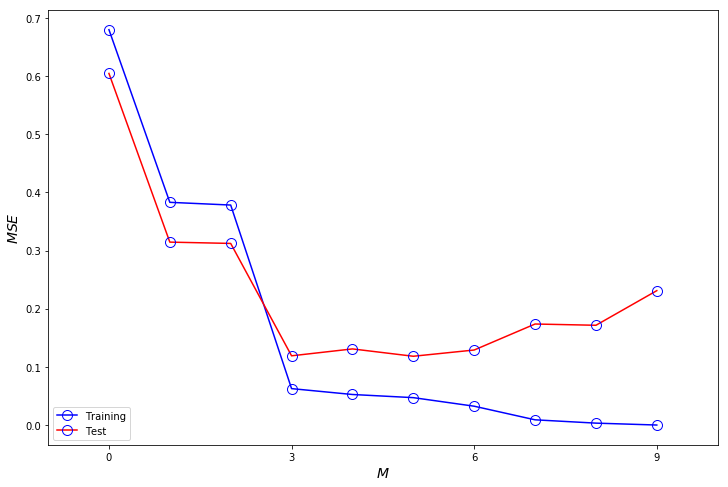

In [12]:
# 100 个 test 点
n_te = 100
x_te = np.linspace(0, 1, n_te)
y_te = np.sin(2 * np.pi * x_te) + np.random.normal(0, 0.3, n_te)
# train 和 test 的 MSE
mse_tr = []
mse_te = []
for M in range(10):
    X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
    # the least-squares solution to a linear matrix equation w*X = y_tr
    w = np.linalg.lstsq(X, y_tr)[0]
    mse_tr.append(np.sum((predict(w, x_tr) - y_tr) ** 2 / len(y_tr)))
    mse_te.append(np.sum((predict(w, x_te) - y_te) ** 2 / len(y_te)))
# 画图
plt.figure(figsize=(12, 8))
plt.plot(np.arange(10), mse_tr, 'bo-', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1, label='Training')
plt.plot(np.arange(10), mse_te, 'ro-', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1, label='Test')
plt.xlim(-1, 10)
plt.xlabel('$M$', fontsize=14)
plt.ylabel('$\t{MSE}$', fontsize=14)
plt.legend(loc='lower left')
plt.xticks([0, 3, 6, 9])
plt.show()

## Regularization

为了减小模型的泛化误差, 除了增加数据集大小, 还可以通过在目标函数添加一个正则项 $\lambda \boldsymbol{w}^\top \boldsymbol{w}$ 来设定对模型容量的偏好($\lambda$ 越大表示偏好容量越小的模型), 这种技术被称为 **权重衰减**. 应用了上述正则项的回归被称为 **岭回归(ridge regression)**.

$$\arg \min_\boldsymbol{w} \frac{1}{m} \lVert \hat{\boldsymbol{y}} - \boldsymbol{y} \rVert_2^2 + \lambda \boldsymbol{w}^\top \boldsymbol{w}$$

> 对于 `Least square`, 有很多种方法来达到这个目的, 并且在设计矩阵不是满秩的时候, 这些方法会有区别.
> Ref: [stackexchange](https://stats.stackexchange.com/questions/266631/what-is-the-difference-between-least-square-and-pseudo-inverse-techniques-for-li), [linear_least_squares.pdf](http://www.cameronmusco.com/personal_site/pdfs/linear_least_squares.pdf)

### MAP(Maximum A Posterior)

和 MLE(Maxmium Likelihood Estimation) 一样, MAP 也是一种 Point estimation. 主要是很多时候, full Bayesian 的计算其 posterior 相当困难, MAP 提供有点贝叶斯味道的点估计.

例如对 $\theta$, 利用贝叶斯公式:

$$\theta_\text{MAP} = \arg \max_\theta p(\theta | \boldsymbol{x}) = \arg \max_\theta \log p(\boldsymbol{x} | \theta) + \log p(\theta)$$

> $\log p(\boldsymbol{x} | \theta)$ 对应着标准的对数似然项, $\log p(\theta)$ 就是先验分布.

对于本节例子的 $\boldsymbol{w}$, 假设我们有一个先验知识:

$$p(\boldsymbol{w} | \alpha) = \mathcal{N} (\boldsymbol{w}; \boldsymbol{0}, \alpha^{-1} \boldsymbol{I}) = \left( \frac{\alpha}{2 \pi} \right)^{(M+1)/2} \exp \left( - \frac{\alpha}{2} \boldsymbol{w}^\top \boldsymbol{w} \right)$$

> $\alpha$ 作为超参数控制这个先验分布.

又由贝叶斯公式:

$$p(\boldsymbol{w} | \boldsymbol{x}, \boldsymbol{y}, \alpha, \beta) \propto p(\boldsymbol{y} | \boldsymbol{x}, \boldsymbol{w}, \beta) p(\boldsymbol{w} | \alpha) $$

对上式最大化 MAP 可以得出等价于最小化:

$$\frac{\beta}{2} \lVert \hat{\boldsymbol{y}}(\boldsymbol{x}, \boldsymbol{w}) - \boldsymbol{y} \rVert_2^2 + \frac{\alpha}{2} \boldsymbol{w}^\top \boldsymbol{w}$$

> 正则项的 $\lambda = \frac{\alpha}{\beta}$

0.0
0.0009118819655545162
1.0


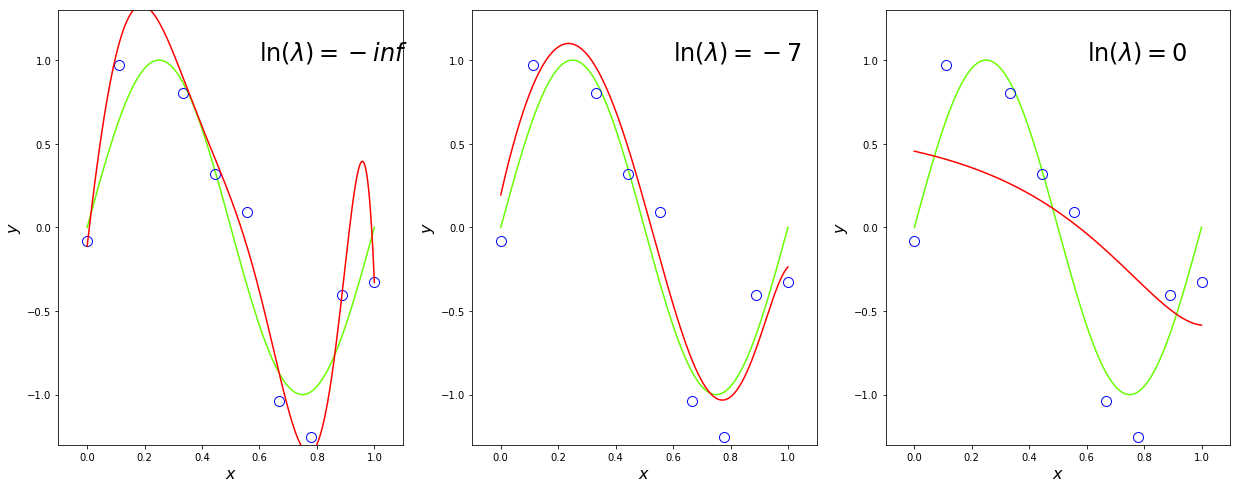

In [18]:
import functools # python3

# there are two(actually more) methods to **least square**(minimize the MSE), 
# Differences between methods can arise when the regressor matrix does not have full rank
def ridge_regression(x, y, lamb, M):
    '''ridge regression
    use derivative to calculate the result `w`
    Ref:
    https://blog.csdn.net/daunxx/article/details/51578787
    https://stats.stackexchange.com/questions/82880/
    applying-ridge-regression-for-an-underdetermined-system-of-equations
    
    let the derivation of target function equal to zero, $\bm{w} = (\bm{X}^\top \bm{X}
    + \aplha \bm{I})^{-1} \bm{X}^\top \bm{y}$
    # Arguments:
        x: vector of input variables
        y: targets of input variables
        lamb: regularization parameter
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model    
    '''
    print(lamb)
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    X_2 = X.T.dot(X)
    # np.linalg.inv is the inverse of square
    w = functools.reduce(np.dot, [np.linalg.inv(X_2 + np.dot(lamb, np.identity(X_2.shape[0]))), X.T, y])
    return w


def ridge_regression_psuedoinverse(x, t, lamb, M):
    '''ridge regression
    需要补一下线性代数的东西, 加了一个 $\lambda \boldsymbol{I}$ 之后对 SVD 的影响不知道怎么推导出来的.
    Ref:
    http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf
    https://github.com/alexhuth/ridge
    # Arguments:
        x: vector of input variables
        t: targets of input variables
        lamb: regularization parameter
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model    
    '''
    Phi = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    U, S, Vh = np.linalg.svd(Phi, full_matrices=False)
    Ut = U.T.dot(t)
    return functools.reduce(np.dot, [Vh.T, np.diag(S/(S**2 + lamb)), Ut])

    
# 9-阶函数回归
M = 9
fig, axes = plt.subplots(1, 3, figsize=(21, 8))
axes = np.ravel(axes)
for log_lamb, ax in zip([-np.inf, -7, 0], axes):
    w_ridge = ridge_regression(x_tr, y_tr, np.exp(log_lamb), M)
    # 画图
    ax.plot(x, y, color="#66FF00")
    ax.plot(x_tr, y_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)    
    ax.plot(x, predict(w_ridge, x), 'r')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.text(0.6, 1, '$\ln(\lambda)={}$'.format(log_lamb), size=24)

## Gaussian Distribution

$$\mathcal{N}(x; \mu, \sigma) = \frac{1}{(2 \pi \sigma^2)^{1/2}} \exp \left( -\frac{1}{2 \sigma^2} (x - \mu)^2 \right)$$

For a D-dimensional $\boldsymbol{x}$

$$
\mathcal{N}(\boldsymbol{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2 \pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\boldsymbol{x} - \boldsymbol{\mu}) \right)
$$

> $\boldsymbol{\Sigma}$ 是一个 $D \times D$ 的协方差矩阵, $|\boldsymbol{\Sigma}|$ 是其行列式(determinant).

* 高斯函数是墒最大的连续函数.
* 由中心极限定理, 高斯函数应

高斯分布中跟 $\boldsymbol{x}$ 有关的一个 **二次型(quadratic form)** .

$$\Delta^2 = (\boldsymbol{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\boldsymbol{x} - \boldsymbol{\mu})$$

> 量( quantity ) $\Delta$ 是 $\boldsymbol{\mu} 和 \boldsymbol{x}$ 之间的 **Mahalanobis distance**(马式距离, 当 $\boldsymbol{\Sigma} = \boldsymbol{I}$ 时退化为欧几里得距离(Euclidean distance).)

在 $\Delta^2$ 固定(constant)的地方其高斯函数在 x-space 上的平面上也是固定的.

不失一般性(without loss of generality), 只考虑 $\boldsymbol{\Sigma}$ 为对称阵(symmetric)的时候.

简证上述观点:

令 $\boldsymbol{\Lambda} = \boldsymbol{\Sigma}^{-1}$, 并且我们可以把它写成一个 symmetric 和 一个 antisymmetric(or skew-symmetric, $\boldsymbol{A}^\top = - \boldsymbol{A}$) 的情况: $\boldsymbol{\Lambda} = \frac{\boldsymbol{\Lambda} + \boldsymbol{\Lambda}^\top}{2} + \frac{\boldsymbol{\Lambda} - \boldsymbol{\Lambda}}{2} = \boldsymbol{\Lambda}^S + \boldsymbol{\Lambda}^A$, 并且 antisymmetric 的对角线均为 0, 所以其二次型为 0 (Pf. Sketch: $\boldsymbol{x}^\top \boldsymbol{A}^\top \boldsymbol{x} = \boldsymbol{x}^\top(-\boldsymbol{A}) \boldsymbol{x}$, 要使 $m = -m, \Rightarrow m = 0$ 所以同理二次型 $\boldsymbol{x}^\top \boldsymbol{Ax} = 0$). 所以如果是不对称的, 也可以提取出其中的对阵分量.


因为 $\boldsymbol{\Sigma}$ 为实对称阵, 故可以取一组相互正交的实特征向量(并且 $\boldsymbol{u_i}^\top \boldsymbol{u_i} = 1$):

$$\boldsymbol{\Sigma u_i} = \lambda_i \boldsymbol{u_i}$$

所以

$$\boldsymbol{\Sigma} = \sum_{i=1}^{D} \lambda_i \boldsymbol{u}_i \boldsymbol{u}^\top_i = \boldsymbol{U} diag(\boldsymbol{\lambda})\boldsymbol{U}^\top$$

> 上式可以举一个 $2 \times 2$ 的情况来理解, 并且有 $\boldsymbol{U}^\top \boldsymbol{U} = \boldsymbol{UU}^\top = \boldsymbol{I}$

$$\boldsymbol{\Sigma}^{-1} = \sum_{i=1}^D \frac{1}{\lambda_i} \boldsymbol{u}_i \boldsymbol{u}_i^\top$$

协方差矩阵 $\boldsymbol{\Sigma}$ 相当于把标准多维高斯分布在特征基向量 $\boldsymbol{u}_i$ 上进行了 $\sqrt{\lambda_i}$ 的尺度变换.

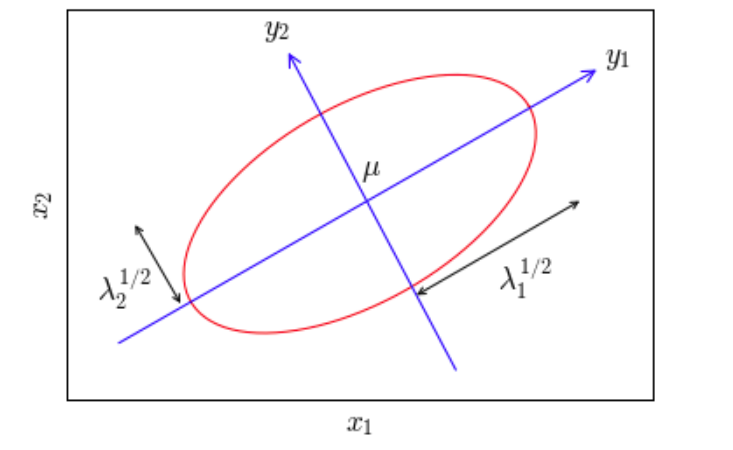

> 上式由 $\boldsymbol{\Sigma}^{-1} = (\boldsymbol{U} diag(\boldsymbol{\lambda})\boldsymbol{U}^\top)^{-1}$ 和正交矩阵的性质推得 

$$\Delta^2 = \sum_{i=1}^D \frac{y_i^2}{\lambda_i}, \text{for }y_i = \boldsymbol{u}_i^\top (\boldsymbol{x} - \boldsymbol{\mu})$$

formming $\boldsymbol{y}= (y_1 \cdots y_D)^\top$

$$\boldsymbol{y} = \boldsymbol{U}(\boldsymbol{x} - \boldsymbol{\mu})$$

考虑到 $\boldsymbol{U}$ 的正交性, 所以 $\boldsymbol{x} = \boldsymbol{U}^\top \boldsymbol{y} + \boldsymbol{\mu}$

又对于任意方阵, 有

$$|\boldsymbol{\Sigma}|^{1/2} = \prod_{j=1}^D \lambda_j^{i,j}$$

> 证明见 [Determinant/Trace and Eigenvalues of a Matrix](https://yutsumura.com/determinant-trace-and-eigenvalues-of-a-matrix/)

使用 Jacobian determinant 进行坐标变换($\boldsymbol{x} \rightarrow \boldsymbol{y}$), 得到 $p(\boldsymbol{y}) = p(\boldsymbol{x}) |\boldsymbol{J}| = p(\boldsymbol{x}) \sqrt{|\boldsymbol{U}^\top|^2} = p(\boldsymbol{x})\sqrt{|\boldsymbol{U}^\top \boldsymbol{U}|} = 1 \cdot p(\boldsymbol{x}) |_\boldsymbol{y} = \prod_{j=1}^D \frac{1}{(2 \pi \lambda_j)^{1/2}} \exp\left(-\frac{y_j^2}{2 \lambda_j}\right)$

所以其实多维高斯就相当于在各个特征基上的独立高斯单维分布的乘积.

所以同样有以下性质:

* 归一化: $\int p(\boldsymbol{y})d \boldsymbol{y} = 1$
* $\mathbb{E}(\boldsymbol{x}) = \boldsymbol{\mu}$

Pf. Sketch

> 本来这里面的变量都必须是粗体的(因为是向量/矩阵), 这里为了简便从略

$$\mathbb{E}(x) = \frac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \int \exp\left(-\frac{1}{2}(x-\mu)^\top\Sigma^{-1}(x-\mu)\right)x dx \\
= \frac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \int \exp\left(-\frac{1}{2}z^\top \Sigma^{-1}z\right)(z + \mu)dz$$

这里的换元($z = x - \mu$)技巧很好, 这样 $(z + \mu)$ 中 $z$ 跟左边那部分构成一个奇函数, 积分直接为 $0$, $\mu$ 那边真好就是乘以一个多维高斯的积分, 所以显然的证.

* $\mathbb{E}(\boldsymbol{x} \boldsymbol{x}^\top) = \boldsymbol{\mu\mu}^\top + \boldsymbol{\Sigma}$

不太好证, mark

* $cov(\boldsymbol{x}) = \boldsymbol{\Sigma}$

### Limitaton of Gaussian Distribution

一个 D-dimensional Gaussian distribution 的独立参数数量级为 $O(D^2)$ (协方差矩阵和均值向量), 求逆操作的复杂度也增大. 所以一般可以限制协方差矩阵为对角阵 $diag(\sigma^2_i)$, 更加地, 我们还可以限制为 $\sigma \boldsymbol{I}$, 这时候的协方差矩阵就是各向同性(isotropic)的了.

高斯分布的另一个问题在于他只有一个 **峰值（unimodal）**，所以不能很好的表示 **多模态（multimodal）** 的分布。之后我们可以看到，这个问题可以通过引入 **隐变量(latent/hidden variables)** 来解决。

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


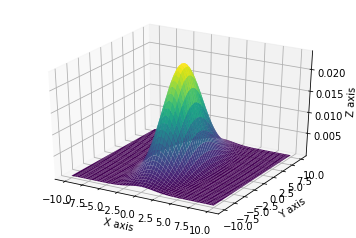

In [8]:
"""
多维高斯分布的 3-d 图
"""
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import bivariate_normal

# parameters
mu_x = 0
sigma_x = np.sqrt(3)

mu_y = 0
sigma_y = np.sqrt(15)

# Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
Z = bivariate_normal(X,Y,sigma_x,sigma_y,mu_x,mu_y)

# Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Conditional Gaussian distribution

Suppose $\boldsymbol{x}$ is D-dimensional vector, $\mathcal{N}(\boldsymbol{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma})$. then partition $\boldsymbol{x}$ into

$$\boldsymbol{x} = \left( \begin{matrix}\boldsymbol{x}_a \\ \boldsymbol{x}_b \end{matrix} \right)\\
\boldsymbol{\mu} = \left(\begin{matrix}\boldsymbol{\mu}_a \\ \boldsymbol{\mu}_b \end{matrix}\right) \\
\boldsymbol{\Sigma} = \left( \begin{matrix} \boldsymbol{\Sigma}_{aa} & \boldsymbol{\Sigma}_{ab} \\ \boldsymbol{\Sigma}_{ba} & \boldsymbol{\Sigma}_{bb} \end{matrix}\right) \\
= \left( \begin{matrix}\sigma_1^2 & \rho \sigma_1 \sigma_2 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2 \end{matrix} \right)$$

> $\boldsymbol{\Lambda}$ 是 symmetric matrix, 所以$\boldsymbol{\Lambda}_{ab}^\top = \boldsymbol{\Lambda}_{ba}$

先考虑二次型部分, 所以, 原二次型可以分解为(为了方便, 省略粗体了...)

$$-\frac{1}{2}(x-\mu)^\top \Sigma^{-1}(x - \mu) = \\
-\frac{1}{2}(x_a - \mu_a)^\top \Lambda_{aa} (x_a - \mu_a) -\frac{1}{2}(x_a - \mu_a)^\top \Lambda_{ab} (x_b - \mu_b) -\frac{1}{2}(x_b - \mu_b)^\top \Lambda_{ba} (x_a - \mu_a) -\frac{1}{2}(x_b - \mu_b)^\top \Lambda_{bb}(x_b - \mu_b) \tag{1}$$

> $\Lambda = \Sigma^{-1}$ 是 `precision matrix`.

把上述结果以 $x_a$ 为自变量, 我们可以看出其依然是一个关于 $x_a$ 的二次型, 所以可以认为条件分布 $p(x_a | x_b)$ (**可以把 $x_b$ 看作是已观察的数据**) 依然是一个高斯分布.

又由 $x^\top \Sigma^{-1} \mu = \mu^\top \Sigma^{-1} x$ (因为他们都是标量, 所以显然是对称阵)

$$-\frac{1}{2}(x-\mu)^\top\Sigma^{-1}(x-\mu) = -\frac{1}{2} x^\top \Sigma^{-1} x + x^\top \Sigma^{-1} \mu + \text{const} \tag{2}$$

其中 $\text{const} = -\frac{1}{2} \mu^\top \Lambda \mu$

> 上述方法叫做 `配方法(completing the square)`

> `const` denotes terms which are independent of x

通过对比 $(1) (2)$, 我们可以 $x_a$ 的二阶项 $-\frac{1}{2}x_a^\top \Lambda_{aa} x_a$, 所以 $\Sigma_{a|b} = \Lambda_{aa}^{-1}$

我们继续提取 $x_a$ 的一阶项

$$x_a^\top \left\{ \Lambda_{aa} \mu_{a} - \Lambda_{ab}(x_b - \mu_b) \right\}$$

> 上式用到了 $\Lambda_{ab}^\top = \Lambda_{ba}$ 和标量是对称阵的性质.

而 $x_a$ 的一阶项的系数按照 $(2)$ 为 $\Sigma_{a|b}^{-1} \mu_{a|b}$, 所以

$$\mu_{a|b} = \mu_a - \Lambda_{aa}^{-1} \Lambda_{ab}(x_b - \mu_b)$$

上式还可以转化为协方差矩阵的形式

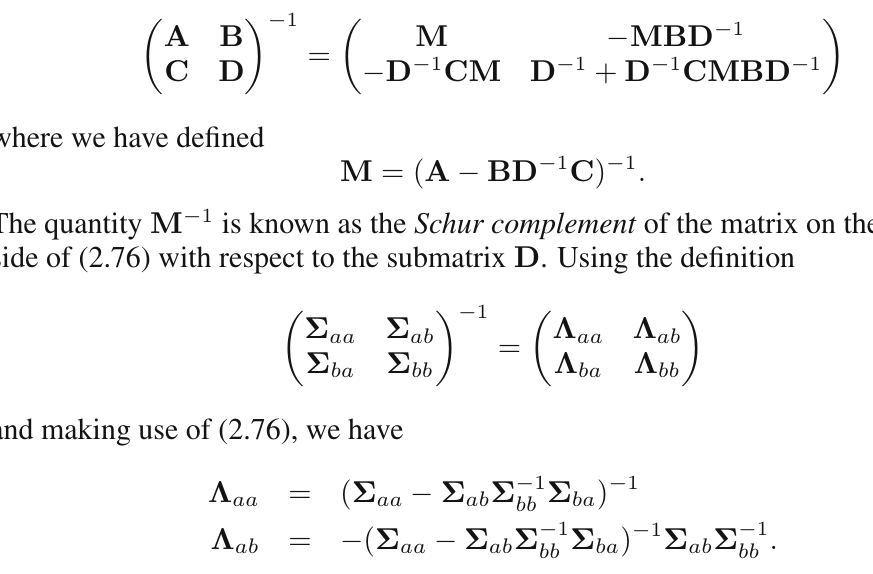

> 就是靠一些分块矩阵的逆的公式得出来, 不细究

所以最终

$$\mu_{a|b} = \mu_a + \Sigma_{ab} \Sigma_{bb}^{-1}(x_b - \mu_b) \\
\Sigma_{a|b} = \Sigma_{aa} - \Sigma_{ab} \Sigma_{bb}^{-1} \Sigma_{ba}$$

## Marginal(边缘) Gaussian distribution

$$p(x_a) = \int p(x_a, x_b)\mathrm{d}x_b = \mathcal{N}(x_a; \mu_a, \Sigma_{aa})$$

证明过程依然从这个二次型指数的 `配方法` 入手, 到后面 $x_b$ 的项目可以组成一个新的高斯分布的指数二次型, 进而被积分为常数, 而后面的 $x_a$ 项也可以被配方为一个高斯函数的指数二次型.

> 然而, 说的倒简单, 做起来很困难, 在提取出 $x_b$ 项然后积分之后, 剩下的项我提取的有问题, 没有推出来 =,=

## Bayes theorem for Gaussian Distribution



## Full Bayesian inference

频率派在对参数(e.g. $\theta$) 进行点估计时, 目标参数是视作一个 **固定但是未知的值**, 其点估计是一个 **随机变量**. 而贝叶斯派认为其参数就是一个 **unknown and uncertain 的随机变量**.

一般经验先验的选择都是一些比较宽泛(broad, **高墒** )的分布, 例如高斯分布或者无限面积上的均匀分布.

加入我们有一个数据集 $x^{(1)}, \cdots, x^{(n)}$, 通过贝叶斯规则, 我们可以恢复数据对我们关于 $\theta$ **信念(brief)** 的影响:

$$p(\theta | ^{(1)}, \cdots, x^{(n)}) = \frac{p(x^{(1)}, \cdots, x^{(n)}| \theta) p(\theta)}{p(^{(1)}, \cdots, x^{(n)})}$$

由全概率公式(用全概率公式和条件概率公式的 Venn 图理解), 可得

$$p(x^{(n+1)} | x^{(1)}, \cdots, x^{(n)}) = \int p(x^{(n+1)} | \theta) p(\theta | x^{(1)}, \cdots, x^{(n)}) d \theta $$

频率派通过计算方差来确定点估计的不确定性, 而贝叶斯派用 **积分** 来估计不确定性.

* 当训练数据有限时, 贝叶斯方法泛化的很好, 不过计算量大.
* 可以防止过拟合, 而最大似然估计往往会引起过拟合. 

### case study: 贝叶斯线性回归

对线性函数

$$\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}$$

> 如果是曲线你和, $\boldsymbol{x} = (x^0, x^1, \cdots, x^k)^\top$, 其中 k 为多项式阶数

给定 $m$ 个训练样本

$$\hat{\boldsymbol{y}}^{\text{train}} = \boldsymbol{X}^{\text{train}} \boldsymbol{w} \\
p(\boldsymbol{y}^{\text{train}} | \boldsymbol{X}^{\text{train}}, \boldsymbol{w}) = \mathcal{N}(\boldsymbol{y}^{\text{train}}; \boldsymbol{X}^{\text{train}} \boldsymbol{w}, \boldsymbol{I}) \\
\propto \exp \left( -\frac{1}{2}(\boldsymbol{y}^{\text{train}} - \boldsymbol{X}^{\text{train}}\boldsymbol{w})^\top (\boldsymbol{y}^{\text{train}} - \boldsymbol{X}^{\text{train}}\boldsymbol{w}) \right)
$$

> 其中根据 MSE 公式假设 y 上的高斯方差为 1 (**为什么???**), 后文中 $\boldsymbol{X}^{\text{train}} \boldsymbol{y}^{\text{train}}$ 
> 简写为$\boldsymbol{X} 和 \boldsymbol{y}$

先验

$$p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}; \boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0)$$

> 一般来说, $\boldsymbol{\Sigma}$ 不会用很复杂的协方差矩阵, 一般就是 $diag (\boldsymbol{\lambda}_0)$

后验

$$p(\boldsymbol{w} | \boldsymbol{X}, \boldsymbol{y}) \propto p(\boldsymbol{y} | \boldsymbol{X}, \boldsymbol{w}) p(\boldsymbol{w})$$